In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
# Load the dataset
df = pd.read_csv('/content/stock_data.csv')

# Display the first few rows of the dataset
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/stock_data.csv'

In [5]:
# Use only the 'Close' column for predictions
data = df['Close'].values.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [6]:
# Function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Choose sequence length (number of time steps to look back)
sequence_length = 60  # Example sequence length

# Create sequences of data
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [7]:
# Initialize the LSTM model
model = Sequential()

# Add LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
74/74 [==============================] - 9s 75ms/step - loss: 0.0079 - val_loss: 8.0771e-04
Epoch 2/20
74/74 [==============================] - 4s 53ms/step - loss: 0.0012 - val_loss: 5.3254e-04
Epoch 3/20
74/74 [==============================] - 4s 51ms/step - loss: 0.0010 - val_loss: 4.5024e-04
Epoch 4/20
74/74 [==============================] - 4s 59ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 5/20
74/74 [==============================] - 4s 60ms/step - loss: 0.0010 - val_loss: 8.8246e-04
Epoch 6/20
74/74 [==============================] - 4s 50ms/step - loss: 9.5414e-04 - val_loss: 6.4484e-04
Epoch 7/20
74/74 [==============================] - 4s 53ms/step - loss: 9.3390e-04 - val_loss: 4.3874e-04
Epoch 8/20
74/74 [==============================] - 5s 68ms/step - loss: 8.6621e-04 - val_loss: 5.1103e-04
Epoch 9/20
74/74 [==============================] - 4s 51ms/step - loss: 7.8184e-04 - val_loss: 6.9921e-04
Epoch 10/20
74/74 [==============================] - 4s 52ms/

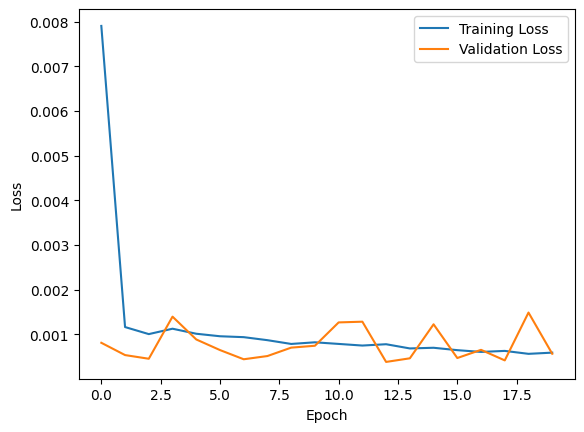

In [9]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


19/19 [==============================] - 1s 20ms/step


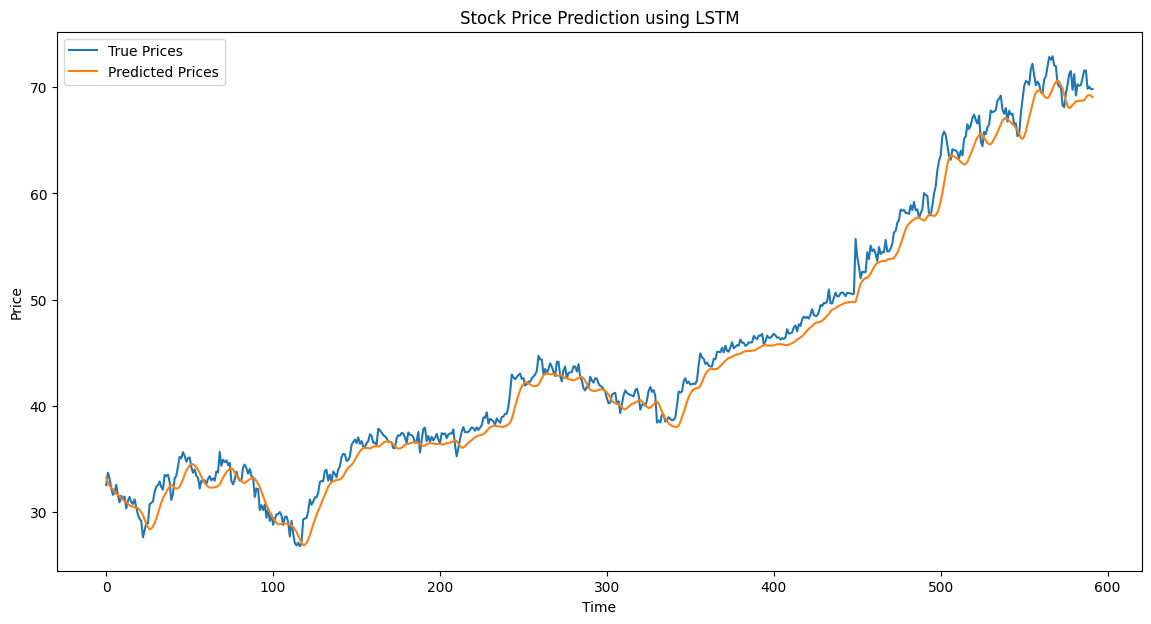

In [10]:
# Predictions
predicted_data = model.predict(X_test)

# Inverse transform predictions and actual values
predicted_prices = scaler.inverse_transform(predicted_data)
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predicted vs true prices
plt.figure(figsize=(14, 7))
plt.plot(true_prices, label='True Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()
